In [8]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

result = llm.invoke("What is the capital of France?")
result.content

'The capital of France is Paris.'

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import Annotated

# GRAPH STATE
class State(TypedDict):
    topic: str
    characters: str
    settings: str
    premises: str
    story_intro: str

    

In [4]:
# nodes
def generate_characters(state: State):
    """Generate characters for the story"""
    mesg = llm.invoke(f"create a 2 character names and brief traits for a story about {state['topic']}")
    return {"characters": mesg.content}

def generate_settings(state: State):
    """Generate settings for the story"""
    mesg = llm.invoke(f"create a valid settings for a story about {state['topic']}")
    return {"settings": mesg.content}

def generate_premises(state: State):
    """Generate premises for the story"""
    mesg = llm.invoke(f"create a one sentence plot premise for a story about {state['topic']}")
    return {"premises": mesg.content}

def combine_elements(state: State):
    """combine characters, settings and premises into a story intro"""
    msg = llm.invoke(f"combine the following elements into a story intro: {state['characters']}, {state['settings']}, {state['premises']}")
    return {"story_intro": msg.content}

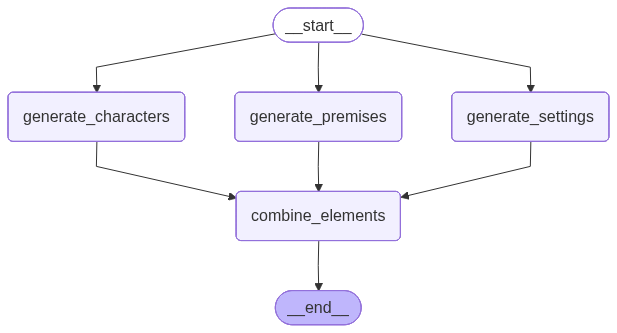

In [5]:
# build the graph
graph = StateGraph(State)
graph.add_node("generate_characters", generate_characters)
graph.add_node("generate_settings", generate_settings)
graph.add_node("generate_premises", generate_premises)
graph.add_node("combine_elements", combine_elements)

# define the edges
graph.add_edge(START, "generate_characters")
graph.add_edge(START, "generate_settings")
graph.add_edge(START, "generate_premises")
graph.add_edge("generate_characters", "combine_elements")
graph.add_edge("generate_settings", "combine_elements")
graph.add_edge("generate_premises", "combine_elements")
graph.add_edge("combine_elements", END)
# compile the graph
compiled_graph = graph.compile()
# display the graph
display(Image(compiled_graph.get_graph().draw_mermaid_png()))






In [9]:
state = {"topic": "time travel"}

result = compiled_graph.invoke(state)
print(result["story_intro"])

**Title: "Echoes of Tomorrow"**

In the heart of the Chrono Nexus, a hidden sanctuary beneath the overgrown ruins of a once-thriving city, the air hummed with the energy of temporal rifts. Elara Voss stood in the Time Chamber, her sharp gaze fixed on the shimmering portal of the Temporal Conduit. The star map above her shifted and swirled, a cosmic dance of timelines and events that beckoned her to explore the very fabric of time itself. She had spent years unraveling the mysteries of time travel, driven by an unyielding curiosity and a fierce determination to prove her theories. But today, her heart was heavy with a personal mission—one that transcended her scientific ambitions.

Her brother’s illness had become a ticking clock, and desperation had led her to this moment. The ethical implications of altering the past weighed on her mind, but the thought of losing him was a burden she could no longer bear. As she adjusted the settings on the Temporal Conduit, her thoughts were interrup